# TO DO LIST
1. Get Number of Unique cars
    1. Check if the redundant cars were from same site or different sites
66. Stats about unique data in each col
2. Distribution of unique cars on
    1. Color
    2. Mileage
    3. Year
    4. Price
    5. Transmission
3. Which website was used most to collect data
4. Which words were used to describe the car most
5. Dealers vs Individuals
6. Which location has most cards being sold


In [398]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [334]:
%matplotlib inline

In [335]:
df = pd.read_csv("IDSF21-Homework 1.csv", encoding="ISO-8859-1")

In [336]:
df.columns

Index(['Timestamp', 'Car Make', 'Car Model', 'Dealer or Individual', 'Price',
       'Year', 'Location', 'Mileage', 'Doors', 'Color', 'Transmission', 'VIN#',
       'Engine', 'Description', 'Web link'],
      dtype='object')

In [337]:
df.dtypes

Timestamp                object
Car Make                 object
Car Model                object
Dealer or Individual     object
Price                   float64
Year                     object
Location                 object
Mileage                 float64
Doors                    object
Color                    object
Transmission             object
VIN#                     object
Engine                   object
Description              object
Web link                 object
dtype: object

In [338]:
df.head

<bound method NDFrame.head of               Timestamp Car Make Car Model Dealer or Individual    Price  \
0     9/1/2021 15:50:42    Honda    Accord               Dealer   7999.0   
1     9/1/2021 15:52:55    Honda    Accord               Dealer  12180.0   
2     9/1/2021 15:53:30    Honda    Accord           Individual  15523.0   
3     9/1/2021 15:55:11    Honda    Accord               Dealer  10000.0   
4     9/1/2021 15:55:38    Honda    Accord           Individual  19990.0   
...                 ...      ...       ...                  ...      ...   
1057  9/8/2021 14:27:14    Honda    Accord               Dealer  20998.0   
1058  9/8/2021 14:30:30    Honda    Accord               Dealer  19497.0   
1059  9/8/2021 14:32:26    Honda    Accord               Dealer  14994.0   
1060  9/8/2021 14:34:21    Honda    Accord               Dealer  18491.0   
1061  9/8/2021 14:36:54    Honda    Accord               Dealer   9992.0   

      Year             Location   Mileage Doors          

In [339]:
df.astype({'Car Make':'str'}).groupby('Car Make').size()

Car Make
Honda    1061
nan         1
dtype: int64

In [340]:
df['Car Make'].fillna("Honda", inplace=True)

In [341]:
df.astype({'Car Model':'str'}).groupby('Car Model', as_index=False).size()

,Car Model,size
0,Accord,1061
1,nan,1


In [342]:
df['Car Model'].fillna("Accord", inplace=True)

In [343]:
df.dropna(how='any', inplace=True)

In [344]:
df.astype({'Dealer or Individual':'str'}).groupby('Dealer or Individual', as_index=False).size()

,Dealer or Individual,size
0,Dealer,638
1,Individual,37


In [345]:
df['Price'].isna().sum()

0

<AxesSubplot:>

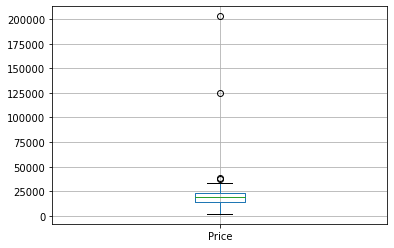

In [346]:
df.boxplot(column=['Price'])

In [347]:
price_q1 = df['Price'].quantile(0.25)
price_q3 = df['Price'].quantile(0.75)
price_iqr = price_q3-price_q1
price_filter = (df['Price']>=price_q1 -  1.5*price_iqr) & (df['Price']<= price_q3 + 1.5*price_iqr)
df = df.loc[price_filter]

<AxesSubplot:>

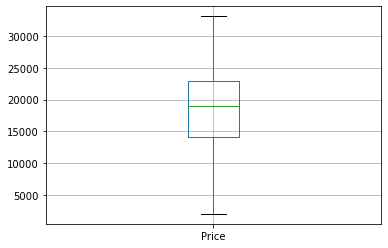

In [348]:
df.boxplot(column=['Price'])

In [349]:
df['price_bucket'] = (df['Price']//1000)*1000

/var/folders/ls/6136ly6n301gs_43z_gxkz5w0000gn/T/ipykernel_50647/2938110676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bucket'] = (df['Price']//1000)*1000


In [350]:
df['price_bucket'].unique()

array([ 7000., 12000., 19000., 21000., 16000., 26000., 22000., 20000.,
       23000., 17000., 24000., 13000.,  9000., 18000., 11000., 27000.,
       14000.,  6000., 15000., 25000., 33000., 10000., 28000.,  4000.,
        2000.,  5000.,  8000., 32000., 30000., 29000.])

/var/folders/ls/6136ly6n301gs_43z_gxkz5w0000gn/T/ipykernel_50647/436471056.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  price_plot.set_xticklabels(price_plot.get_xticks(), size=15)


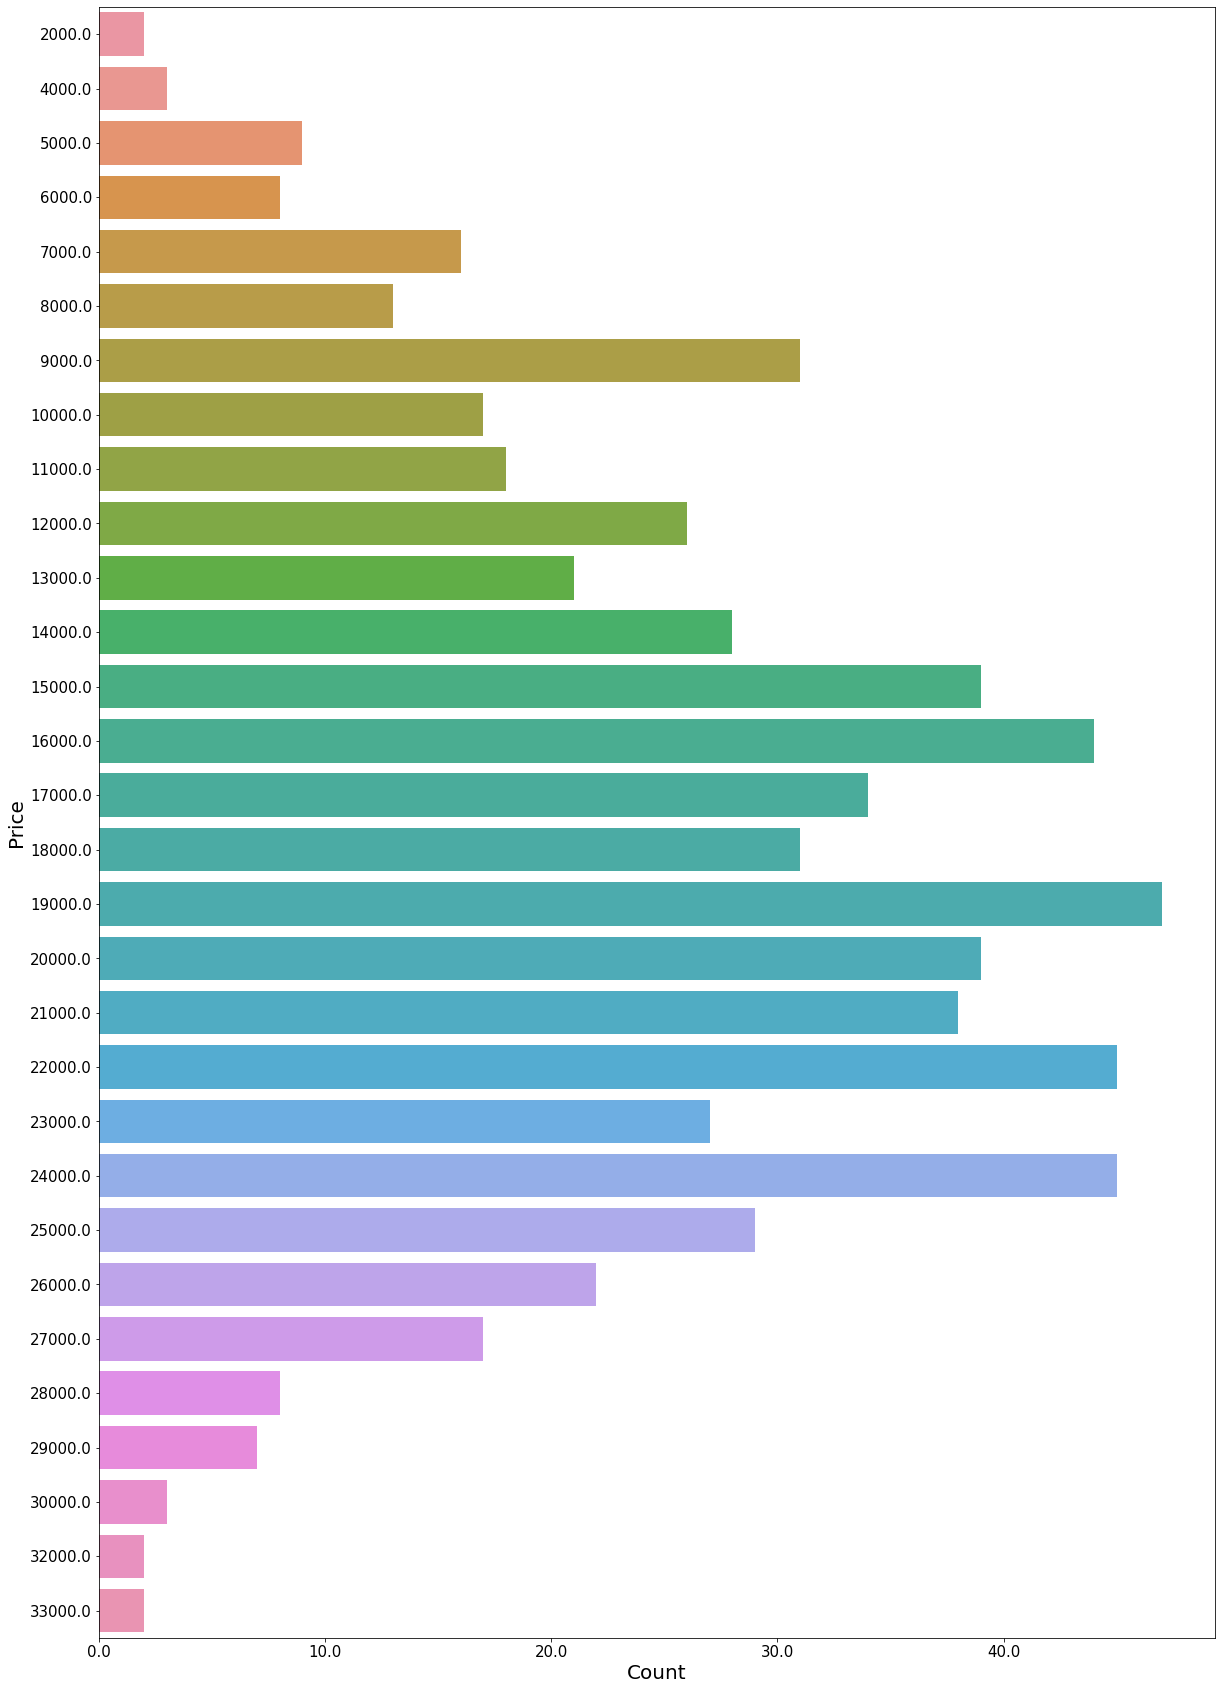

In [351]:
df_prices = df.groupby(['price_bucket']).size()
df_prices = df_prices.sort_index()
ylabel = list(df_prices.values)
fig1, ax1 = plt.subplots(figsize=(20, 30))
price_plot = sns.barplot(ax=ax1, y=df_prices.index, x=df_prices.values, orient='h')
price_plot.set_yticklabels(df_prices.index, size=15)
price_plot.set_ylabel("Price", size=20)
price_plot.set_xticklabels(price_plot.get_xticks(), size=15)
price_plot.set_xlabel("Count", size=20)
plt.show()

In [352]:
pd.to_numeric(df['Year'], errors='coerce').notnull().all()

True

In [353]:
df['Year'].astype('int64').describe()

count      671.000000
mean      2049.530551
std        888.139294
min       2004.000000
25%       2013.000000
50%       2016.000000
75%       2018.000000
max      25021.000000
Name: Year, dtype: float64

<AxesSubplot:xlabel='Year'>

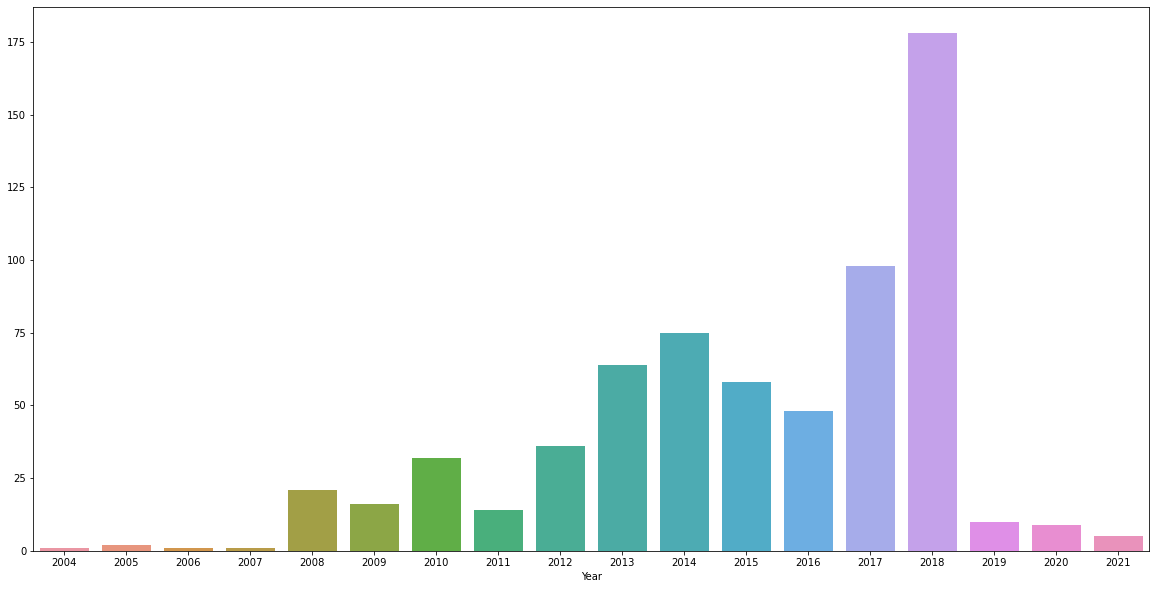

In [354]:
df = df.astype({'Year' : 'int64'})
df = df.loc[(df['Year']>=2004) & (df['Year']<=2021)]
df_year = df.groupby(['Year']).size()
fig2, ax2 = plt.subplots(figsize=(20, 10))
sns.barplot(ax=ax2, x=df_year.index, y=df_year.values)

In [357]:
df['Mileage'].describe()

count       669.000000
mean      62995.367713
std       49005.004397
min           0.000000
25%       28693.000000
50%       55077.000000
75%       86562.000000
max      559857.000000
Name: Mileage, dtype: float64

<AxesSubplot:>

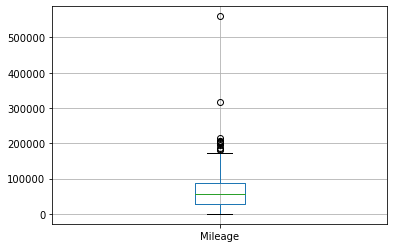

In [368]:
df.boxplot(column=['Mileage'])

In [367]:
df['avg_mile'] = df['Mileage']/(2022-2004)

<AxesSubplot:>

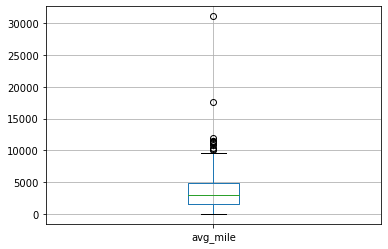

In [369]:
df.boxplot(column=['avg_mile'])

In [370]:
df['avg_mile'].describe()

count      669.000000
mean      3499.742651
std       2722.500244
min          0.000000
25%       1594.055556
50%       3059.833333
75%       4809.000000
max      31103.166667
Name: avg_mile, dtype: float64

In [371]:
mile_q1 = df['avg_mile'].quantile(0.25)
mile_q3 = df['avg_mile'].quantile(0.75)
mile_iqr = mile_q3-mile_q1
mile_filter = (df['avg_mile']>=price_q1 -  1.5*price_iqr) & (df['avg_mile']<= price_q3 + 1.5*price_iqr)
df = df.loc[mile_filter]

In [372]:
df['avg_mile'].describe()

count      582.000000
mean      3979.636980
std       2594.112942
min       1027.055556
25%       2040.972222
50%       3520.166667
75%       5265.527778
max      31103.166667
Name: avg_mile, dtype: float64

In [377]:
pd.to_numeric(df['Doors'], errors='coerce').notnull().all()

False

In [384]:
df['Doors'] = df['Doors'].replace('4 Door Sedan', '4')

/var/folders/ls/6136ly6n301gs_43z_gxkz5w0000gn/T/ipykernel_50647/1913831552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = df['Doors'].replace('4 Door Sedan', '4')


In [386]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [393]:
engine_specs = list(df['Engine'])

In [394]:
engine_corpus = ' '.join(engine_specs)

In [401]:
Counter(engine_corpus.split(' ')).most_common(50)

[('2.4L', 184),
 ('Gas', 151),
 ('Cyl', 146),
 ('4', 141),
 ('L', 133),
 ('I4', 129),
 ('Engine', 120),
 ('2.4', 101),
 ('4-Cylinder', 88),
 ('DOHC', 73),
 ('16V', 67),
 ('', 62),
 ('hp', 60),
 ('1.5', 58),
 ('1.5L', 58),
 ('Turbo', 53),
 ('Liter', 50),
 ('4-Cyl,', 47),
 ('GDI', 43),
 ('i-VTEC,', 38),
 ('3.5L', 33),
 ('185', 28),
 ('6', 28),
 ('MPFI', 28),
 ('3.5', 24),
 ('V6', 21),
 ('4cyl', 21),
 ('Inline-4', 18),
 ('cyl', 17),
 ('2.0L', 16),
 ('6-Cylinder', 15),
 ('-', 13),
 ('SOHC', 12),
 ('Cylinder', 12),
 ('192', 12),
 ('i-VTEC', 11),
 ('24V', 11),
 ('Turbo,', 9),
 ('Turbocharged', 9),
 ('I-4', 9),
 ('Horsepower', 9),
 ('Gas,', 8),
 ('CVT', 8),
 ('4-cyl,', 7),
 ('Gasoline', 7),
 ('177', 7),
 ('278', 7),
 ('(2.4L', 7),
 ('CVT)', 7),
 ('1.5l', 5)]

In [402]:
car_desc = df['Description']

In [404]:
desc_corpus = (' '.join(car_desc))

In [407]:
Counter(desc_corpus.split(' ')).most_common(50)

[('', 2732),
 ('and', 1278),
 ('the', 1168),
 ('a', 750),
 ('to', 742),
 ('of', 716),
 ('-', 643),
 ('*', 551),
 ('Front', 531),
 ('is', 527),
 ('Power', 502),
 ('with', 497),
 ('Honda', 474),
 ('for', 458),
 ('Accord', 457),
 ('Blue', 442),
 ('Book', 399),
 ('on', 384),
 ('Rear', 352),
 ('Kelley', 348),
 ('in', 323),
 ('our', 315),
 ('Brand', 303),
 ('you', 301),
 ('from', 278),
 ('are', 273),
 ('Air', 270),
 ('or', 255),
 ('vehicle', 229),
 ('at', 226),
 ('Steering', 226),
 ('We', 208),
 ('door', 205),
 ('your', 203),
 ('2018', 203),
 ('Image', 202),
 ('Driver', 197),
 ('this', 187),
 ('Seats,', 187),
 ('Awards', 175),
 ('KBB.com', 172),
 ('Audio', 165),
 ('City/Highway', 161),
 ('more', 159),
 ('Heated', 159),
 ('Control,', 156),
 ('System,', 154),
 ('MPG', 150),
 ('Limited', 149),
 ('Passenger', 148)]

In [409]:
from wordcloud import WordCloud

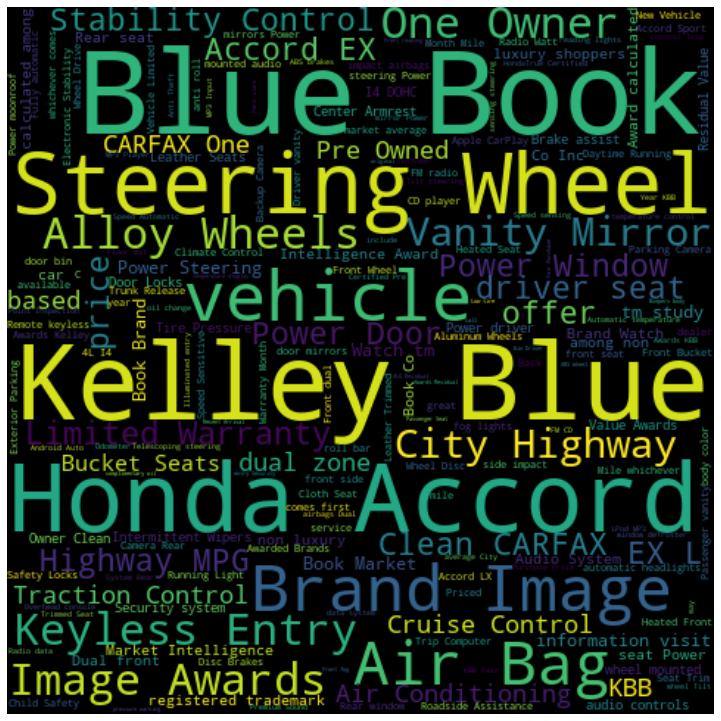

In [469]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(desc_corpus)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [471]:
import nltk

In [494]:
from nltk.util import ngrams
import string
english_stopwords = set(nltk.corpus.stopwords.words('english'))

In [497]:
def extract_ngrams(data, num):
    tokens = nltk.word_tokenize(data)
    clean_tokens = []
    for t in tokens:
        a = t.strip()
        if a.lower() not in english_stopwords and a.lower() not in string.punctuation:
            clean_tokens.append(a.lower())
    n_grams = ngrams(clean_tokens, num)
    return [ ' '.join(grams) for grams in n_grams]

In [498]:
desc_2grams = extract_ngrams(desc_corpus, 2)
desc_3grams = extract_ngrams(desc_corpus, 3)

In [504]:
count_2grams = Counter(desc_2grams)
count_3grams = Counter(desc_3grams)

In [513]:
count_2grams.least_common(50)

AttributeError: 'Counter' object has no attribute 'least_common'

In [514]:
count_2grams.most_common(50)

[('blue book', 427),
 ('kelley blue', 403),
 ('honda accord', 378),
 ('steering wheel', 357),
 ('brand image', 202),
 ('keyless entry', 186),
 ('image awards', 182),
 ('alloy wheels', 180),
 ('limited warranty', 154),
 ('stability control', 145),
 ('vanity mirror', 145),
 ('air bag', 137),
 ('power windows', 136),
 ('city/highway mpg', 130),
 ('clean carfax', 126),
 ('power door', 122),
 ('driver seat', 112),
 ('traction control', 111),
 ('cruise control', 107),
 ('air conditioning', 106),
 ('bucket seats', 106),
 ('power steering', 106),
 ('kbb.com brand', 102),
 ('carfax one-owner', 101),
 ('dual zone', 100),
 ('book brand', 100),
 ('based brand', 99),
 ('watch tm', 99),
 ('tm study', 99),
 ('study kelley', 99),
 ('book market', 99),
 ('information visit', 99),
 ('visit www.kbb.com', 99),
 ('www.kbb.com kelley', 99),
 ('book registered', 99),
 ('registered trademark', 99),
 ('trademark kelley', 99),
 ('book co.', 99),
 ('awards based', 98),
 ('brand watch', 98),
 ('market intelligenc

In [507]:
df['VIN#'].unique().shape

(422,)

In [423]:
df['Location'].unique().shape

(338,)

In [424]:
locs = list(df['Location'])

In [426]:
import requests

In [438]:
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'sensor':'false', 'address':''}
def get_coordinates(location):
    params['address'] = location
    r = requests.get(url, params)
    print(r.json())
    results = r.json()['results']
    print(results)
    print(location)
    return [results[0]['geometry']['locations']['lat'], results[0]['geometry']['locations']['lng']] 

In [439]:
map_locs = [get_coordinates(loc) for loc in locs]

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}
[]
Enumclaw, WA


IndexError: list index out of range

In [440]:
import geocoder

In [442]:
map_locs = []
for loc in locs:
    print(loc)
    map_locs.append(geocoder.google(loc).latlng)

Enumclaw, WA
Greensburg, PA 
Columbus Sawmill, OH 
301 PARK MANOR DR, PITTSBURGH, PA 15205
Pittsburgh, PA
Pittsburgh, PA
Maple Shade, NJ
Honolulu, HI
US
Feasterville Trevose, PA
Ohio
Anaheim, CA
Waipahu, HI
4801 BAUM BLVD, PITTSBURGH, PA 15213
Honolulu, HI
Washington, PA
Atlanta
Phoenixville, PA
US
Honolulu, HI
Wexford, PA
Honolulu, HI
California, USA
US
Wexford
Greensburg
Anaheim, CA 
Larchmont, NY
Atlanta
Honolulu, HI
Washington PA
Turnersville, NJ
Ballwin, MO
Seattle, WA
US
Pittsburgh, PA
301 PARK MANOR DR, PITTSBURGH, PA 15205
Honolulu, HI
Newtown, PA
Canonsburg, PA
Georgia
4710 William Penn Highway, Monroeville, PA 15146
Pittsburgh
US
California, USA
Honolulu, HI
Maple Shade, NJ
Miami, FL
911 Clairton Blvd, Pittsburgh, PA 15236
Oakland, CA
Philadelphia, PA
Honolulu, HI
Ohio
Pittsburgh, PA
Greensburgh
New York, USA
31210
Washington PA
Honolulu, HI
5802 University Boulevard, Moon Township, PA 15108
US
Ohio
Malvern, PA
Staten Island, NY
Oakland, CA
Florida, USA
Union, NJ
Honolulu, HI

Hendersonville, North Carolina
Bloomington, Illinois
Greensburg, PA
Indiana, PA
Lewisville, TX
Corpus Christi, Texas
Pittsburgh, PA
Monrovia, CA
Anchorage, AK
Panorama City, CA
Los Angeles, CA
Wilmington, Delaware
Los Angeles, CA
Woodbridge, Virginia
Sacramento, California
Buffalo, NY
Kentwood, MI
Harrisonburg, VA
Pittsburgh, PA
Mcmurray, PA
Phoenix
Nashville
Adamsburg, PA
Monroeville
Irvine, CA
Temecula, CA
Inglewood, CA
Framingham, MA
Inglewood, CA
Marietta, GA
Aurora
Monrovia, CA
Columbus, MS
Canonsburg, PA
Edmonds, WA
Westmont, IL
Cookeville, TN
3800 S Lapeer Rd, Lake Orion, MI 48359
24355 Haggerty Rd Novi, MI 48375
15 E Michigan Ave, Ypsilanti, MI 48198
15 E Michigan Ave, Ypsilanti, MI 48198
18900 Hall Rd, Clinton Township, MI 48038
1835 Maplelawn Dr, Troy, MI 48084
21262 Telegraph Rd, Southfield, MI 48033
21262 Telegraph Rd, Southfield, MI 48033
4706 Ann Arbor Rd, Dundee, MI 48131
15 E Michigan Ave, Ypsilanti, MI 48198
Raleigh
15 E Michigan Ave, Ypsilanti, MI 48198
Redgranite
480

In [443]:
map_locs

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [449]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="viveksourabh2010@gmail.com")
location = geolocator.geocode("175 5th Avenue NYC")
print((location.latitude, location.longitude))


Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States
(40.741059199999995, -73.98964162240998)
{'place_id': 155649502, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 264768896, 'boundingbox': ['40.7407566', '40.7413004', '-73.9898715', '-73.9895014'], 'lat': '40.741059199999995', 'lon': '-73.98964162240998', 'display_name': 'Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States', 'class': 'tourism', 'type': 'attraction', 'importance': 0.7405988542685404, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_point_of_interest.p.20.png'}


In [453]:
import time
map_locs = []
for loc in locs:
    time.sleep(1)
    map_locs.append(geolocator.geocode(loc))
    try:
        print(map_locs[-1].latitude, map_locs[-1].longitude)
    except:
        print("Nothing Found")
        map_locs.append({})
    

47.2047793 -121.9916371
40.3014581 -79.5389289
40.09090005 -83.0886080665446
40.4495054 -80.1660146871535
40.4416941 -79.9900861
40.4416941 -79.9900861
39.9526127 -74.9923915
21.304547 -157.855676
39.7837304 -100.445882
40.1513276 -74.988733542723
40.2253569 -82.6881395
33.8340292 -117.93348585416624
21.3866667 -158.009166
40.454491 -79.94754
21.304547 -157.855676
31.3991238 -88.2019828
33.7489924 -84.3902644
40.1303822 -75.5149128
39.7837304 -100.445882
21.304547 -157.855676
40.6264561 -80.055891
21.304547 -157.855676
36.7014631 -118.755997
39.7837304 -100.445882
52.46018745 -6.606515459159162
40.3014581 -79.5389289
33.8340292 -117.93348585416624
40.9278769 -73.7517983
33.7489924 -84.3902644
21.304547 -157.855676
31.3991238 -88.2019828
39.766826 -75.06300404150056
38.5936028 -90.5385549
47.6038321 -122.3300624
39.7837304 -100.445882
40.4416941 -79.9900861
40.4495054 -80.1660146871535
21.304547 -157.855676
40.65294535 -76.34504304490187
40.2625702 -80.1872797
32.3293809 -83.1137366
40.

47.4959464 -121.7851542
39.9622601 -83.0007065
40.7127281 -74.0060152
40.7127281 -74.0060152
38.4758406 -80.8408415
40.3561805 -80.1100556
40.9699889 -77.7278831
32.2105899 -95.8801625
38.8949924 -77.0365581
33.8784649 -84.3010793
33.7849591 -84.442163
41.2148975 -79.3857047
33.9528472 -84.5496148
33.8901036 -84.1429719
29.656092299999997 -82.33979543992415
41.2226155 -73.04622662165758
43.100482 -70.834351
Nothing Found
39.8264158 -86.047757
40.6967762 -73.3854038
40.0812329785158 -74.94325370288671
38.863967521270666 -77.28234174430618
40.85152512033129 -74.07253656557229
39.92696240816327 -86.09534787755102
39.437198 -76.799226
44.504264 -88.055048
40.1819519 -80.2323344
40.1819519 -80.2323344
40.9999202 -80.3471856
31.3991238 -88.2019828
40.3014581 -79.5389289
40.3797913 -79.8094916
39.6345259 -79.9697862
40.317287 -79.3840301
40.4416941 -79.9900861
40.4416941 -79.9900861
40.6264561 -80.055891
40.4416941 -79.9900861
40.4416941 -79.9900861
40.4416941 -79.9900861
40.4416941 -79.99008

In [454]:
len(map_locs)

619

In [455]:
df.count()

Timestamp               582
Car Make                582
Car Model               582
Dealer or Individual    582
Price                   582
Year                    582
Location                582
Mileage                 582
Doors                   582
Color                   582
Transmission            582
VIN#                    582
Engine                  582
Description             582
Web link                582
price_bucket            582
avg_mile                582
dtype: int64

In [509]:
print(type(map_locs[0]))

<class 'geopy.location.Location'>


In [458]:
for loc in map_locs:
    print(loc)

Enumclaw, King County, Washington, 98022, United States
Greensburg, Westmoreland County, Pennsylvania, United States
Extended Stay America - Columbus - Sawmill Rd., Reflections Drive, Columbus, Franklin County, Ohio, 43017, United States
CarShop, 301, Park Manor Drive, Pittsburgh, Allegheny County, Pennsylvania, 15205, United States
Pittsburgh, Allegheny County, Pennsylvania, United States
Pittsburgh, Allegheny County, Pennsylvania, United States
Maple Shade, Maple Shade Township, Burlington County, New Jersey, 08052, United States
Honolulu, Honolulu County, Hawaii, 96813, United States
United States
Feasterville-Trevose, Lower Southampton Township, Bucks County, Pennsylvania, United States
Ohio, United States
Anaheim, Orange County, California, United States
Waipahu, Honolulu County, Hawaii, 96797, United States
4801, Baum Boulevard, Bloomfield, Pittsburgh, Allegheny County, Pennsylvania, 15213, United States
Honolulu, Honolulu County, Hawaii, 96813, United States
Washington County, A

In [460]:
type(map_locs[0])

geopy.location.Location

In [464]:
map_locs[0].raw

{'place_id': 257888177,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 237873,
 'boundingbox': ['47.162991', '47.246211', '-122.026845', '-121.940277'],
 'lat': '47.2047793',
 'lon': '-121.9916371',
 'display_name': 'Enumclaw, King County, Washington, 98022, United States',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.6668664323760151,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png'}

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01001',
    'STATE': '01',
    'COUNTY': '001',
    'NAME': 'Autauga',
    'LSAD': 'County',
    'CENSUSAREA': 594.436},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.496774, 32.344437],
      [-86.717897, 32.402814],
      [-86.814912, 32.340803],
      [-86.890581, 32.502974],
      [-86.917595, 32.664169],
      [-86.71339, 32.661732],
      [-86.714219, 32.705694],
      [-86.413116, 32.707386],
      [-86.411172, 32.409937],
      [-86.496774, 32.344437]]]},
   'id': '01001'},
  {'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01009',
    'STATE': '01',
    'COUNTY': '009',
    'NAME': 'Blount',
    'LSAD': 'County',
    'CENSUSAREA': 644.776},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.577799, 33.765316],
      [-86.759144, 33.840617],
      [-86.953664, 33.815297],
      [-86.954305, 33.844862],
      [-86.96296, 33.844865],
      [-86.9

NameError: name 'geoData' is not defined

In [510]:
eng_2grams = extract_ngrams(engine_corpus, 2)

In [512]:
Counter(eng_2grams).most_common(50)

[('4 cyl', 130),
 ('gas engine', 118),
 ('2.4l i4', 76),
 ('l 4', 75),
 ('2.4l 4-cylinder', 64),
 ('4-cylinder gas', 63),
 ('i4 16v', 60),
 ('cyl 2.4', 58),
 ('2.4 l', 58),
 ('engine 2.4l', 52),
 ('cyl 1.5', 48),
 ('1.5 l', 48),
 ('2.4 liter', 43),
 ('16v gdi', 43),
 ('gdi dohc', 43),
 ('hp 2.4l', 38),
 ('4-cyl i-vtec', 38),
 ('1.5l i4', 34),
 ('i-vtec 2.4', 29),
 ('dohc turbo', 27),
 ('6 cyl', 26),
 ('cyl 3.5', 22),
 ('3.5 l', 22),
 ('engine 4', 21),
 ('185 hp', 20),
 ('3.5l v6', 19),
 ('turbo gas', 18),
 ('4-cylinder turbo', 17),
 ('inline-4 gas', 17),
 ('16v mpfi', 17),
 ('mpfi dohc', 17),
 ('l 2.4l', 16),
 ('2.4l 4cyl', 15),
 ('gas 2.4l', 14),
 ('2.4l inline-4', 13),
 ('l 4-cyl', 12),
 ('1.5l 4-cylinder', 12),
 ('liter 4-cyl', 12),
 ('gas gas', 12),
 ('192 hp', 12),
 ('hp 1.5l', 12),
 ('dohc 2.4l', 12),
 ('i-vtec turbo', 10),
 ('engine 185', 10),
 ('4 cylinder', 10),
 ('l 6', 10),
 ('4cyl cvt', 10),
 ('turbo 1.5', 9),
 ('1.5 liter', 9),
 ('6-cylinder gas', 9)]